<a href="https://colab.research.google.com/github/pao2828/Analisis-de-series-de-tiempo/blob/main/Proyecto_Real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

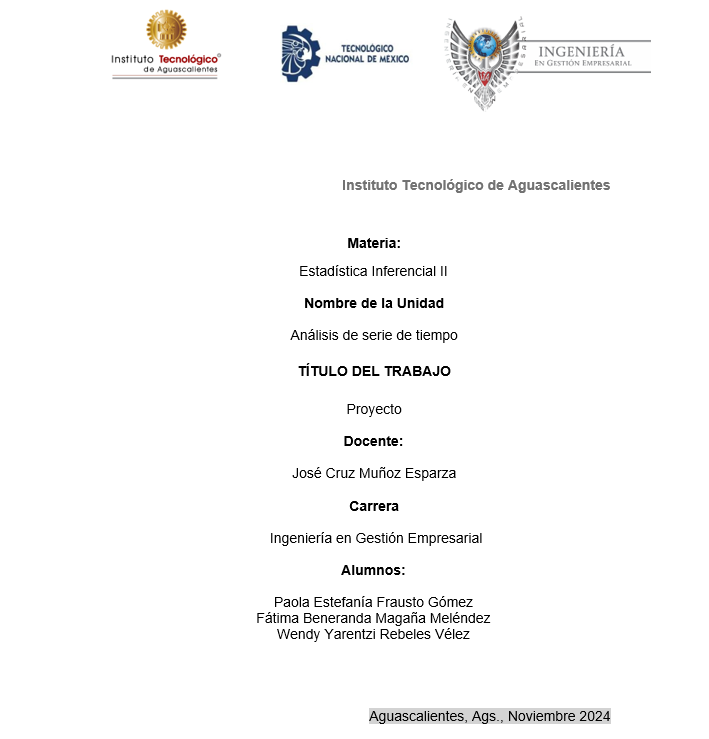

# Introduccion

# Marco teorico

En el análisis de series de tiempo de empresas multinacionales como Nestlé y Starbucks, es importante comprender los códigos con los que identifican sus acciones en diferentes mercados financieros. Cada empresa cotiza en diversas bolsas de valores alrededor del mundo, lo que influye en la disponibilidad y accesibilidad de sus datos para análisis financieros.

Por ejemplo, las acciones de Nestlé están representadas por varios códigos dependiendo de la bolsa en la que se negocien: en la bolsa suiza, las acciones de Nestlé son identificadas por el código NESN.SW; en la bolsa de Helsinki, se utilizan las siglas NESTE.HE; en el mercado extrabursátil de Estados Unidos, las acciones de Nestlé se encuentran bajo el código NSRGY; y en la bolsa de Singapur, se representa con el código NESM.SG. Esta diversidad de códigos refleja cómo una misma compañía puede estar presente en múltiples mercados, lo que permite obtener diferentes perspectivas de su rendimiento financiero global.

En contraste, Starbucks, al ser una empresa que cotiza principalmente en los mercados estadounidenses, tiene un solo código globalmente reconocido: SBUX, lo que simplifica el acceso y análisis de su serie de tiempo en comparación con una empresa como Nestlé, cuya presencia en diferentes mercados internacionales requiere un análisis más complejo de los datos procedentes de diversas fuentes.

# a) Selecciona dos marcas sobre las cuales tengas la hipótesis que están relacionadas entre sí.
Starbucks Corporation-SBUX

Nesstle- NSRGI

**Hipotesis:**La colaboración entre Nestlé y Starbucks, establecida en 2018, causó un aumento significativo en la cuota de mercado global de Nestlé en el sector de café en cápsulas y café premium entre el 1 de enero de 2019 y el 1 de enero de 2023, debido a la incorporación de los productos Starbucks en las plataformas Nespresso y Dolce Gusto.


# b) Realiza un análisis de cada serie de tiempo de manera independiente  

**Starbucks**

Obtén una serie de tiempo, cuya unidad de tiempo sea de un día y realiza las modificaciones necesarias para trabajarla.


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings("ignore")
df=yf.download(
    tickers=["SBUX","NSRGY"],
   start="2019-01-01",
   end="2023-01-01",
   interval="1d",
group_by=None,
    auto_adjust=False,
    actions=False)
# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df
###################################################################################################
#En caso de que no se requiera la hora
#Convertir la columna "Date" a tipo detetime si no lo es ya
df["Date"]=pd.to_datetime(df["Date"])
df["Date"]=df["Date"].dt.date
df.set_index("Date",inplace=True)
df

[*********************100%***********************]  2 of 2 completed


,NSRGY_Open,NSRGY_High,NSRGY_Low,NSRGY_Close,NSRGY_Adj Close,NSRGY_Volume,SBUX_Open,SBUX_High,SBUX_Low,SBUX_Close,SBUX_Adj Close,SBUX_Volume
Date,,,,,,,,,,,,
2019-01-02,80.599998,80.839996,80.040001,80.169998,70.169662,686200,63.680000,64.370003,63.209999,64.320000,56.738697,10094000
2019-01-03,81.949997,82.379997,81.889999,82.209999,71.955185,1113500,63.459999,63.720001,61.400002,61.529999,54.277557,14390100
2019-01-04,82.480003,83.599998,82.230003,83.589996,73.163048,673200,62.400002,64.250000,62.080002,63.570000,56.077099,12694400
2019-01-07,82.769997,82.900002,82.389999,82.709999,72.392830,665900,63.349998,64.239998,62.740002,63.570000,56.077099,10337600
2019-01-08,83.169998,83.360001,82.760002,82.970001,72.620384,457700,63.939999,64.290001,63.049999,63.619999,56.121212,10809700
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,115.559998,116.059998,115.139999,115.639999,109.102684,186600,97.589996,98.300003,96.879997,98.269997,93.803894,3944500
2022-12-27,116.160004,116.550003,115.989998,116.000000,109.442337,181900,98.570000,99.459999,98.209999,99.199997,94.691628,4402500
2022-12-28,116.800003,117.279999,115.720001,115.720001,109.178169,295800,99.410004,99.910004,98.389999,98.599998,94.118896,3491500


Grafica la serie de tiempo junto con dos medias móviles con diferente tamaño de ventana (una que sea la mitad de la otra, por ejemplo) e indica como esto te puede ayudar a visualizar cambios de tendencia.

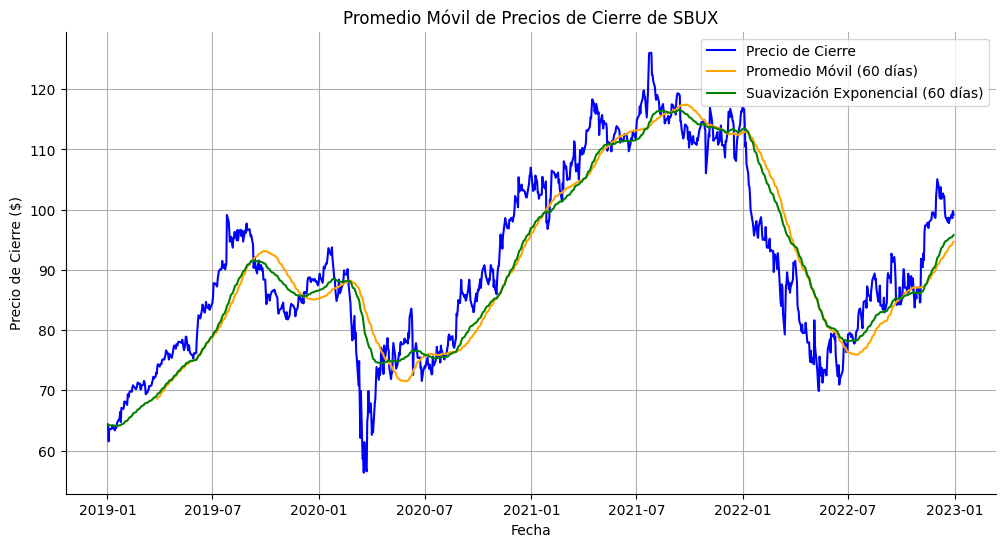

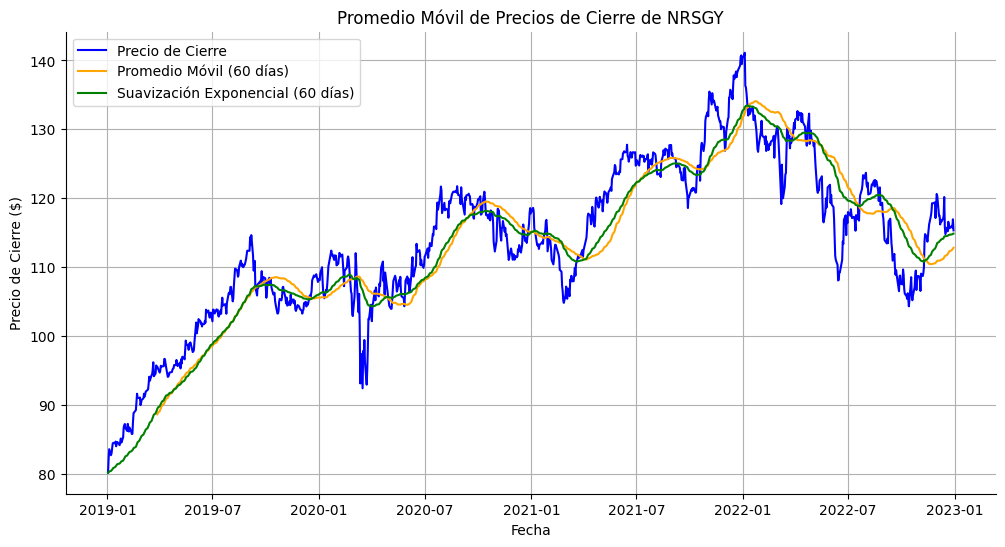

In [ ]:
import matplotlib.pyplot as plt
# Promedio Móvil Simple
ventana_sma = 60
df['SMA'] = df['SBUX_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 60
df['SES'] = df['SBUX_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['SBUX_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de SBUX')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


import matplotlib.pyplot as plt
# Promedio Móvil Simple
ventana_sma = 60
df['SMA'] = df['NSRGY_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 60
df['SES'] = df['NSRGY_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['NSRGY_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de NRSGY')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Realiza una regresión polinomial del grado que consideres necesario (a prueba y error). Grafica la serie de tiempo y la regresión polinomial.

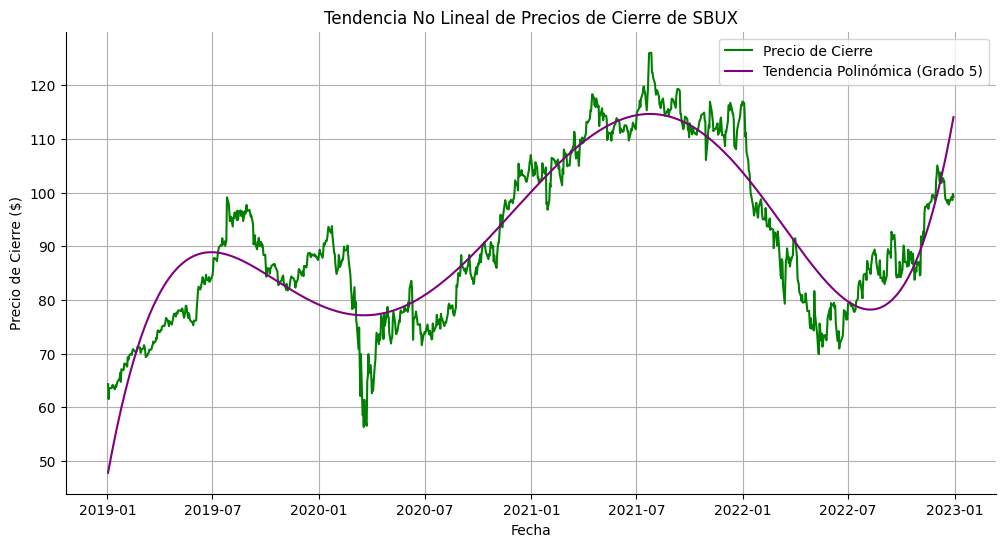

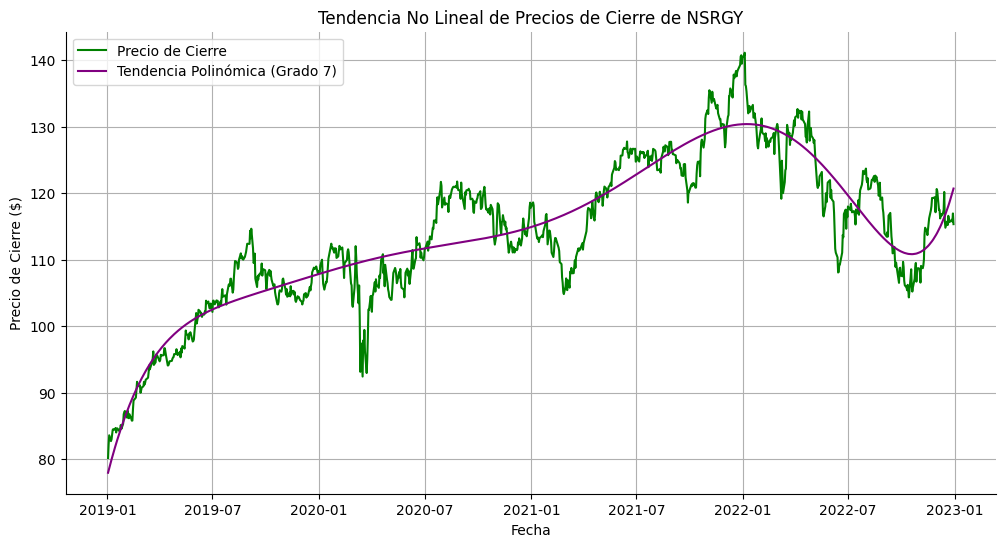

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['SBUX_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 5
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid_SBUX'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de SBUX') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)



from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['NSRGY_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 7
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid_NSRGY'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de NSRGY') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)


Gráfica los residuales del polinomio e intenta deducir una estacionalidad.

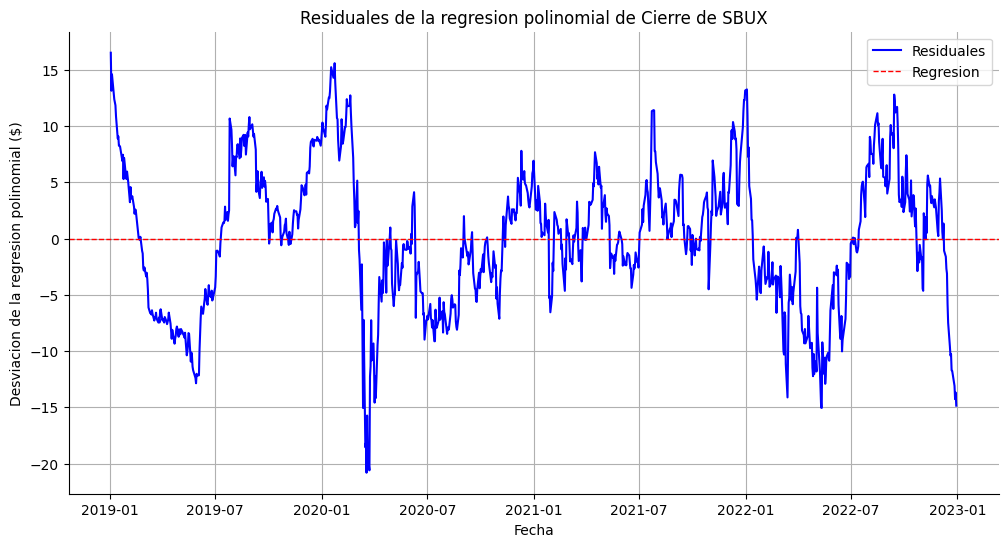

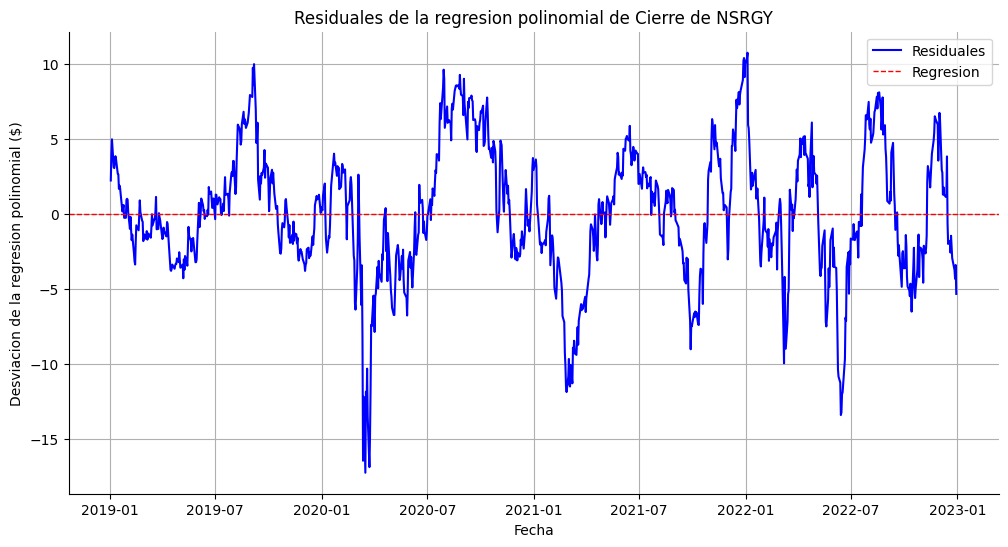

In [ ]:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid_SBUX'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de SBUX')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid_NSRGY'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de NSRGY')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Verificar si existe un patron

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.003968  2148.373186             252.0
1    0.002976  1614.204748             336.0
2    0.007937  1370.308790             126.0
3    0.008929  1182.195890             112.0
4    0.001984   906.774417             504.0


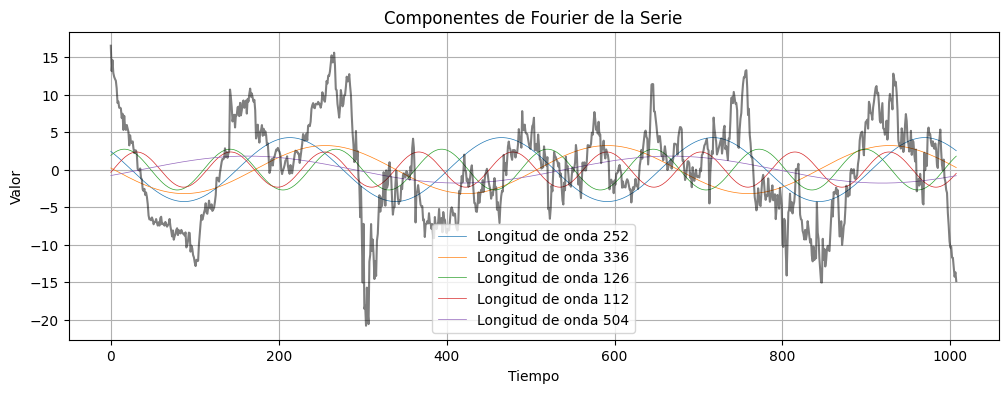

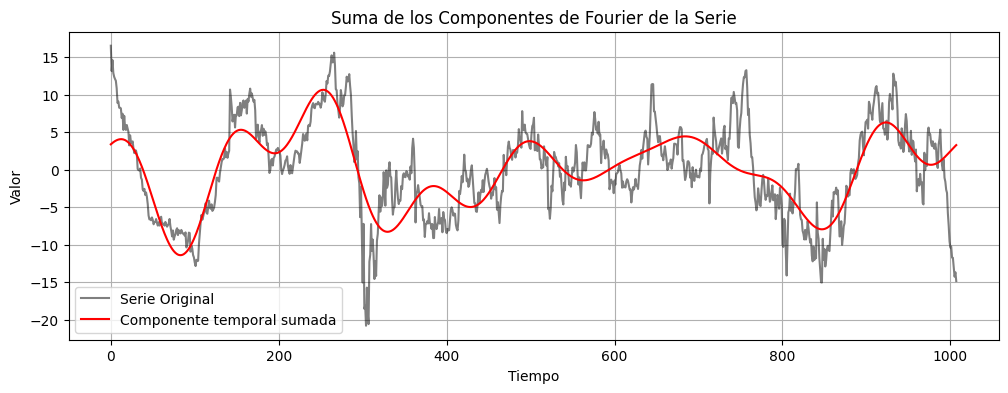

In [ ]:
serie = df['Poly_Resid_SBUX'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.003968  1292.849529        252.000000
1    0.004960   896.062809        201.600000
2    0.011905   876.446136         84.000000
3    0.005952   806.241065        168.000000
4    0.012897   768.508762         77.538462


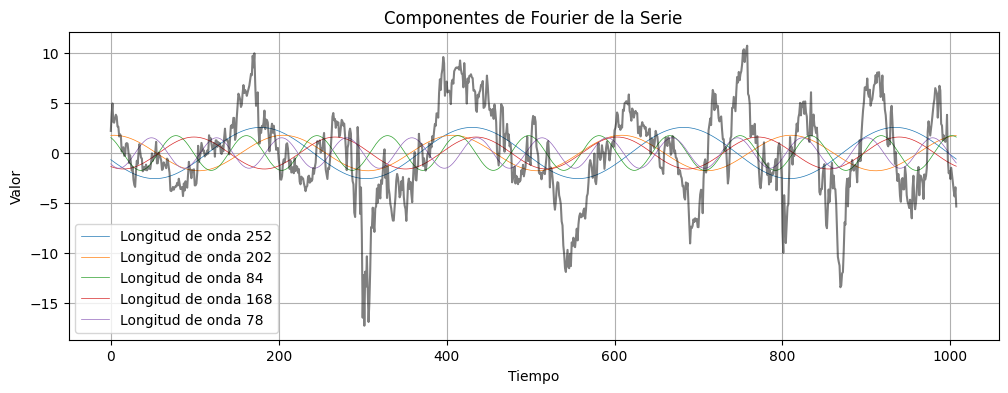

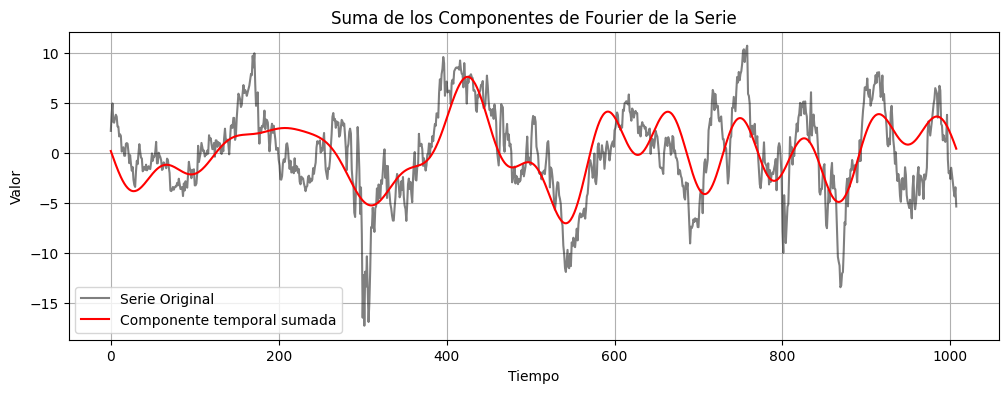

In [ ]:
serie = df['Poly_Resid_NSRGY'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

Descompón la serie de tiempo en sus componentes: tendencia, estacionalidad y ruido. Grafica la descomposición.

`sm.tsa.seasonal_descompose` descompone la serie de tiempo en los componentes Trend, Seasonal y Resid, que son Tendencia, Estacionalidad y Residuos, respectivamente. De tal manera que la serie de tiempo es igual la suma de estos tres elementos.

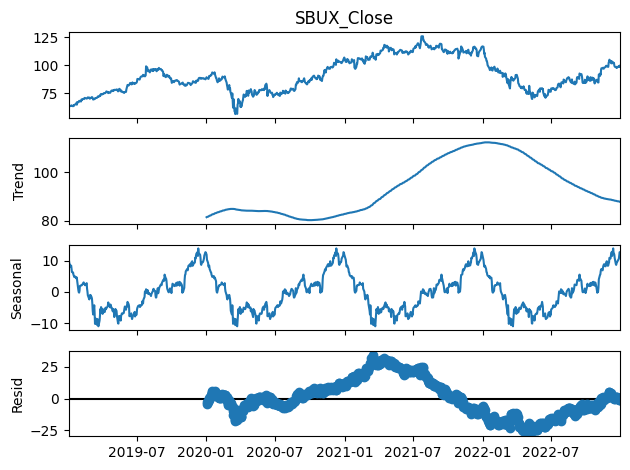

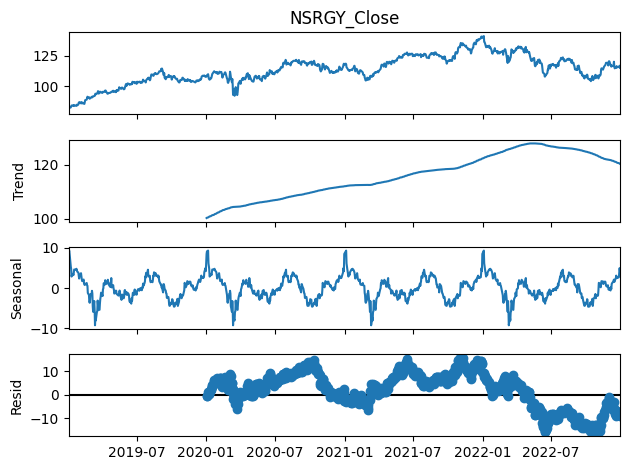

In [ ]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['SBUX_Close'],
    model='additive',
    period=252,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()



# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['NSRGY_Close'],
    model='additive',
    period=252,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

Realiza una prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad. Y realiza otra prueba de hipótesis para comprobar si la estacionalidad es significativa.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipotesis nula (H0): La serie tiene una raiz unitaria (no es estacionaria)
#Hipotesis alternativa (H1): La serie es estacionaria
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en lo la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print('Estadistico ADF:',adf_test[0])
print('P-valor:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print('La tendencia es estacionaria (rechazamos la hipotesis nula)')
else:
    print('La tendencia no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -1.6985127424345805
P-valor: 0.4318789191730751
La tendencia no es estacionaria (aceptamos la hipotesis nula)


In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipotesis nula (H0): La serie tiene una raiz unitaria (no es estacionaria)
#Hipotesis alternativa (H1): La serie es estacionaria
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en lo la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print('Estadistico ADF:',adf_test[0])
print('P-valor:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print('La tendencia es estacionaria (rechazamos la hipotesis nula)')
else:
    print('La tendencia no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -1.6985127424345805
P-valor: 0.4318789191730751
La tendencia no es estacionaria (aceptamos la hipotesis nula)


Prueba t pareada para verificar si la estacionalidad tiene un efecto significativo

In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico t: 1.0600206771827897e-14
Valor p: 0.9999999999999916


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico t: 1.0600206771827897e-14
Valor p: 0.9999999999999916


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


Utilizando los componentes de la descomposición, realiza un gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

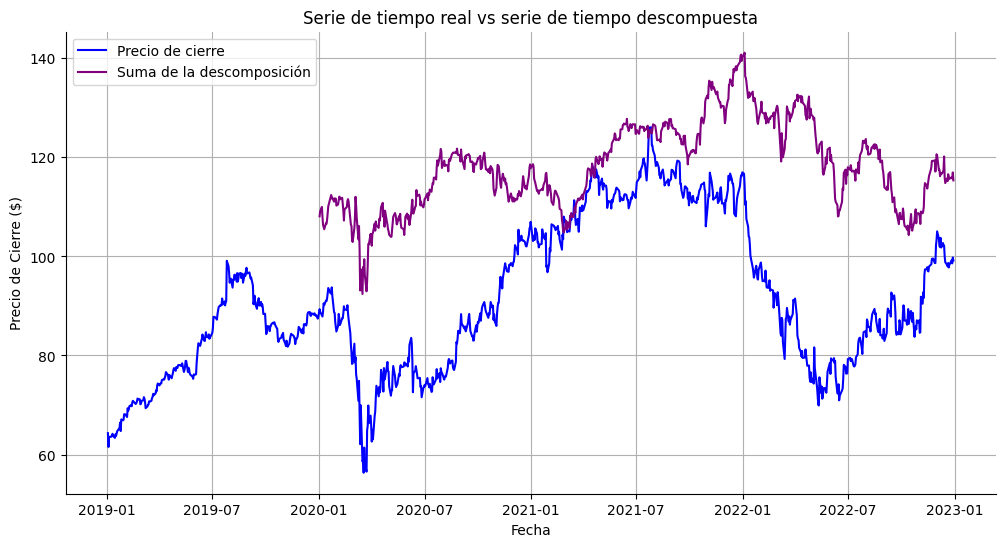

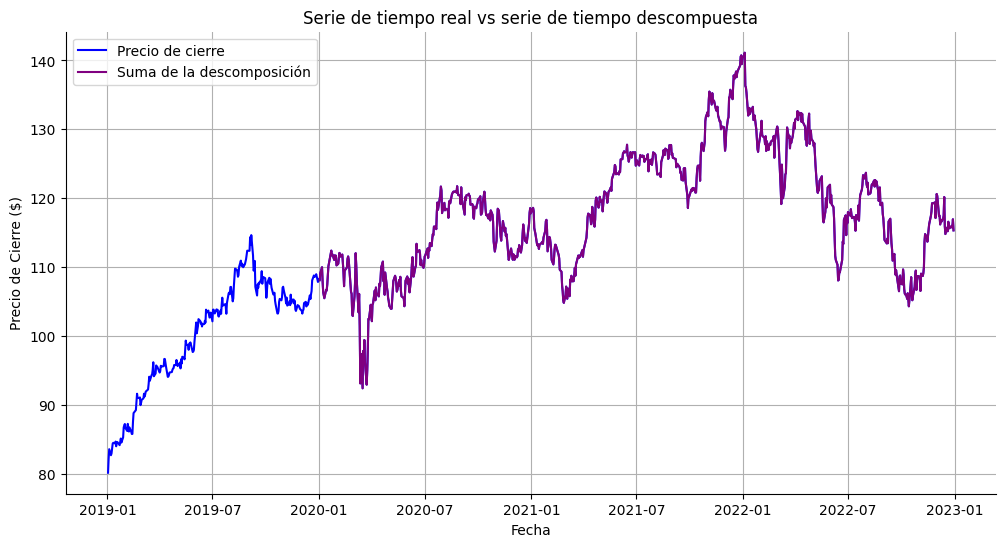

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['SBUX_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.show()


# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['NSRGY_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.show()

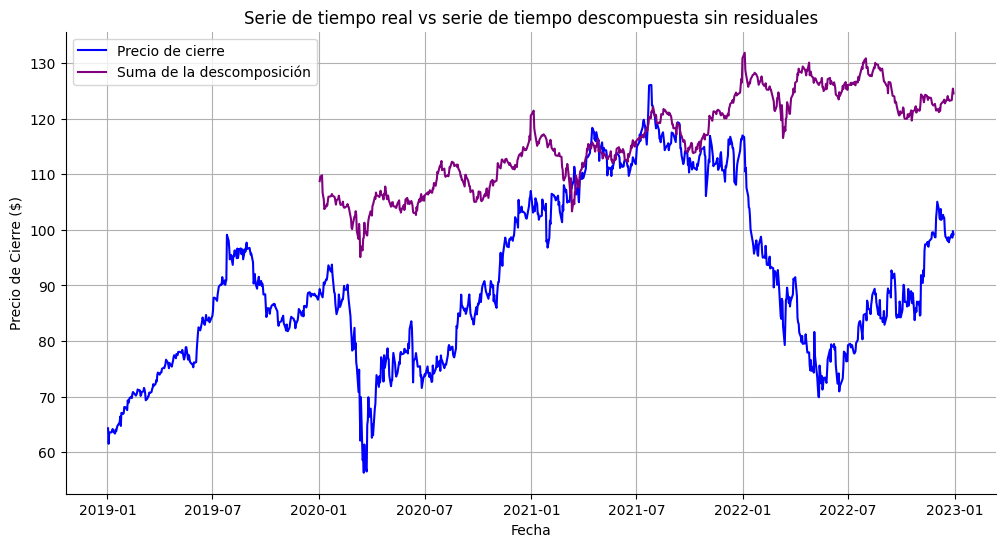

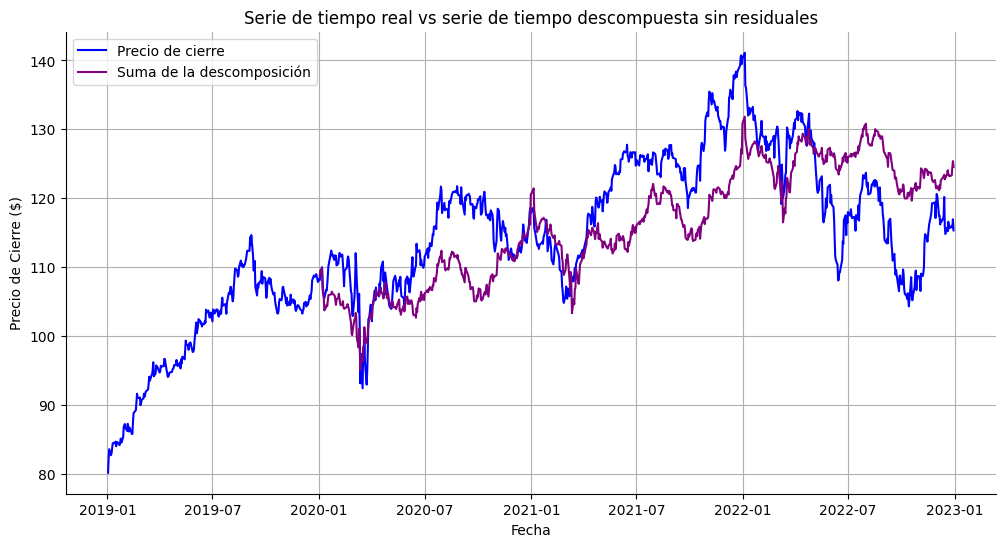

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['SBUX_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['NSRGY_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

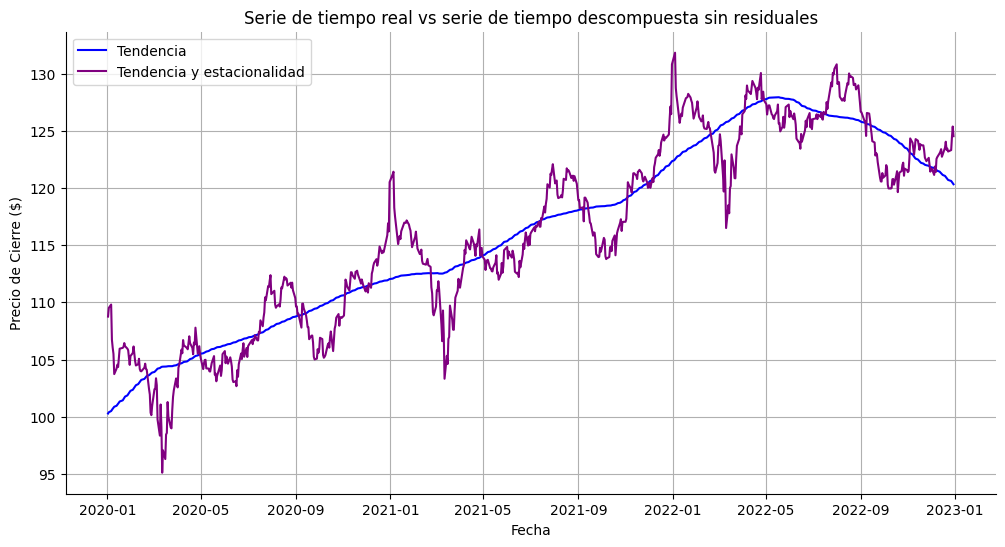

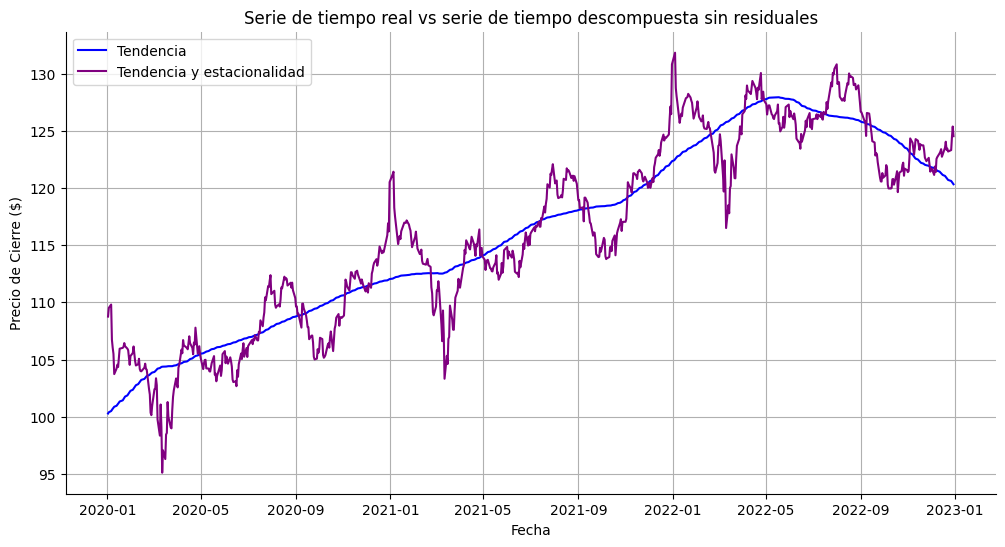

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

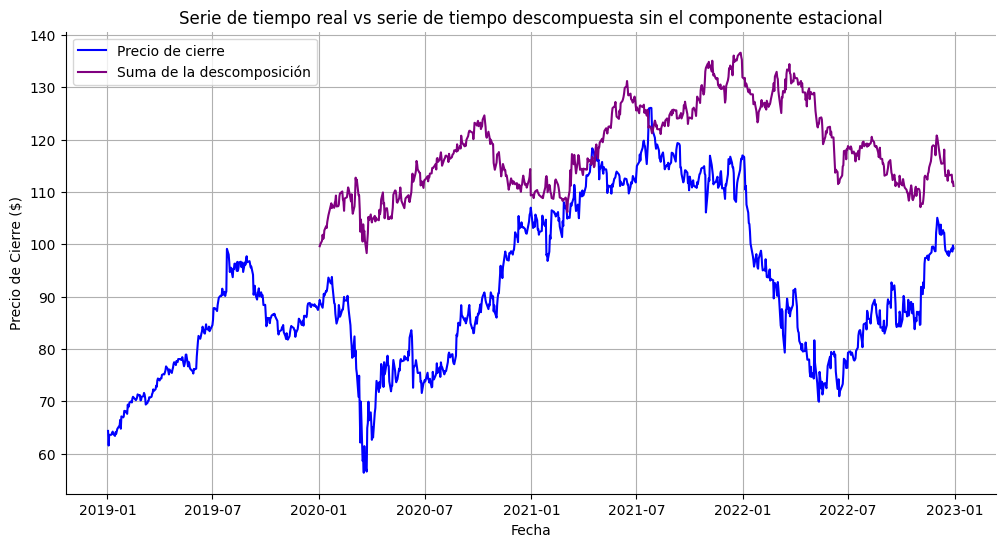

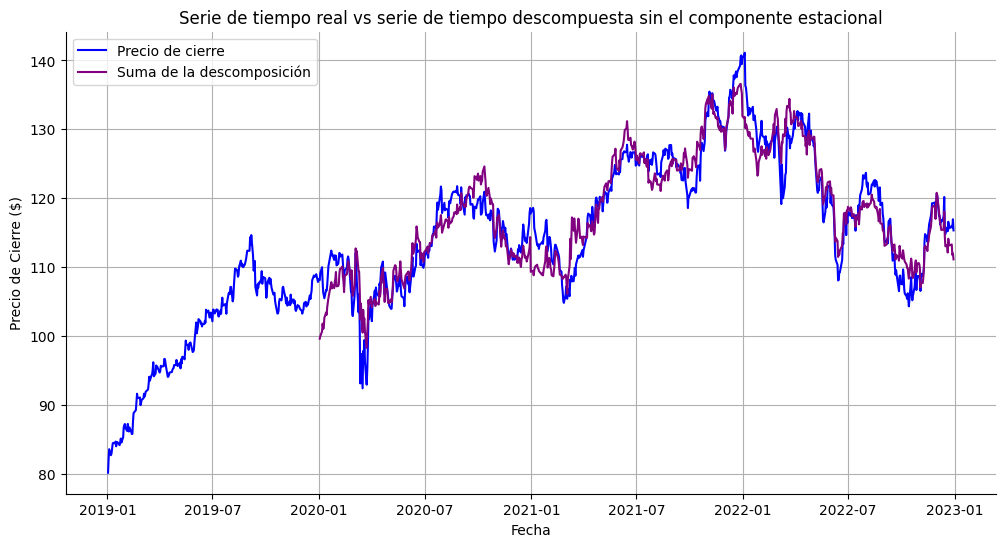

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['SBUX_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['NSRGY_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Nestlé NSRGY**

Grafica la serie de tiempo junto con dos medias móviles con diferente tamaño de ventana (una que sea la mitad de la otra, por ejemplo) e indica como esto te puede ayudar a visualizar cambios de tendencia.

Realiza una regresión polinomial del grado que consideres necesario (a prueba y error). Grafica la serie de tiempo y la regresión polinomial.

Gráfica los residuales del polinomio e intenta deducir una estacionalidad.

Verificar si existe un patron

Descompón la serie de tiempo en sus componentes: tendencia, estacionalidad y ruido. Grafica la descomposición.

Realiza una prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad. Y realiza otra prueba de hipótesis para comprobar si la estacionalidad es significativa.

Prueba t pareada para verificar si la estacionalidad tiene un efecto significativo

Utilizando los componentes de la descomposición, realiza un gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

# c) Investiga el concepto de "causalidad de Granger" y aplícalo a las series de tiempo

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['SBUX_Close', 'NSRGY_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5529  , p=0.2130  , df_denom=1004, df_num=1
ssr based chi2 test:   chi2=1.5575  , p=0.2120  , df=1
likelihood ratio test: chi2=1.5563  , p=0.2122  , df=1
parameter F test:         F=1.5529  , p=0.2130  , df_denom=1004, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4215  , p=0.0123  , df_denom=1001, df_num=2
ssr based chi2 test:   chi2=8.8871  , p=0.0118  , df=2
likelihood ratio test: chi2=8.8481  , p=0.0120  , df=2
parameter F test:         F=4.4215  , p=0.0123  , df_denom=1001, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0267  , p=0.0287  , df_denom=998, df_num=3
ssr based chi2 test:   chi2=9.1438  , p=0.0274  , df=3
likelihood ratio test: chi2=9.1025  , p=0.0280  , df=3
parameter F test:         F=3.0267  , p=0.0287  , df_denom=998, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4022  , p=0.04

Rezago de 1: Se acepta la hipótesis nula (no hay causalidad de Granger).
Rezagos de 2, 3, 4, y 5: Se rechaza la hipótesis nula y se acepta la hipótesis alternativa (sí hay causalidad de Granger).
LO QUE PASA 2 DÍAS ANTES ME AFECTA HOY


# d) Investiga la aplicación del modelo "Prophet", sus alcances y limitaciones, y aplícalo a ambas series de tiempo.

In [ ]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers=['SBUX','NSRGY'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2023-01-01',        # Fecha de inicio
    end='2023-12-30',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  2 of 2 completed


,SBUX_Open,SBUX_High,SBUX_Low,SBUX_Close,SBUX_Adj Close,SBUX_Volume,NSRGY_Open,NSRGY_High,NSRGY_Low,NSRGY_Close,NSRGY_Adj Close,NSRGY_Volume
Date,,,,,,,,,,,,
2023-01-03,100.559998,101.169998,99.470001,100.830002,96.247559,6607700,116.639999,117.129997,115.779999,116.720001,110.121635,224700
2023-01-04,102.690002,104.730003,102.550003,104.459999,99.712578,8166600,118.739998,119.669998,118.279999,119.000000,112.272743,202300
2023-01-05,104.489998,105.099998,103.489998,104.430000,99.683945,5575100,118.260002,118.599998,117.690002,117.949997,111.282104,244600
2023-01-06,105.379997,107.000000,105.010002,106.690002,101.841240,9644100,117.809998,119.910004,117.449997,119.690002,112.923737,247300
2023-01-09,106.519997,106.680000,104.430000,104.739998,99.979858,10124800,120.620003,121.699997,120.470001,120.470001,113.659645,271500
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,94.889999,95.830002,94.339996,95.279999,92.857979,6360400,113.959999,114.019997,113.040001,113.440002,109.727661,261000
2023-12-26,95.339996,95.690002,94.959999,95.669998,93.238068,3709500,113.050003,113.970001,113.050003,113.889999,110.162933,268000
2023-12-27,95.690002,95.779999,94.790001,95.290001,92.867729,4959300,113.730003,114.980003,113.690002,114.699997,110.946419,193900


In [ ]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2rntai/i5ow9z4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2rntai/4gxutbuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50404', 'data', 'file=/tmp/tmprf2rntai/i5ow9z4w.json', 'init=/tmp/tmprf2rntai/4gxutbuc.json', 'output', 'file=/tmp/tmprf2rntai/prophet_modelyfhcsjh5/prophet_model-20241120194757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:47:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


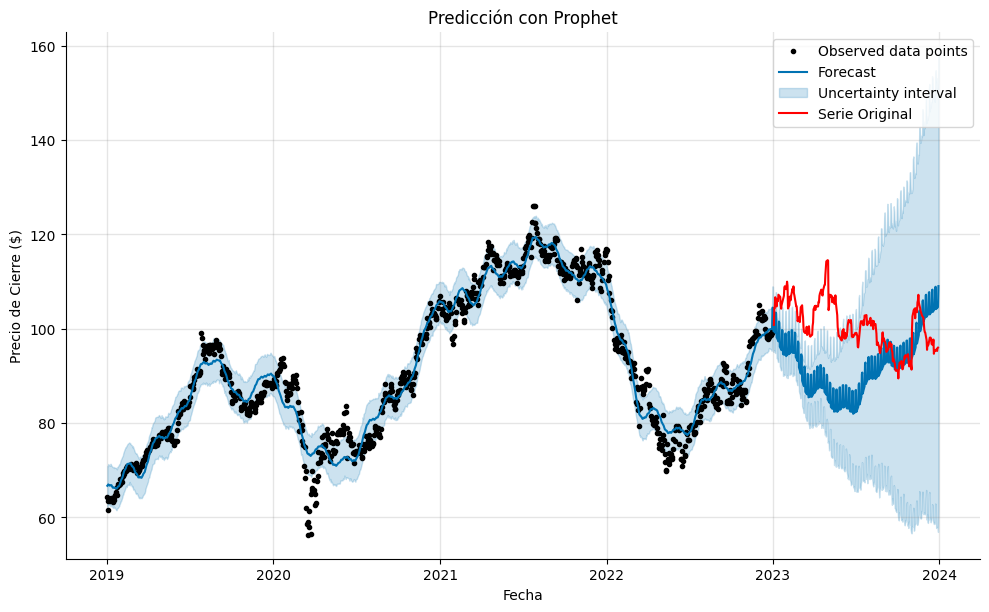

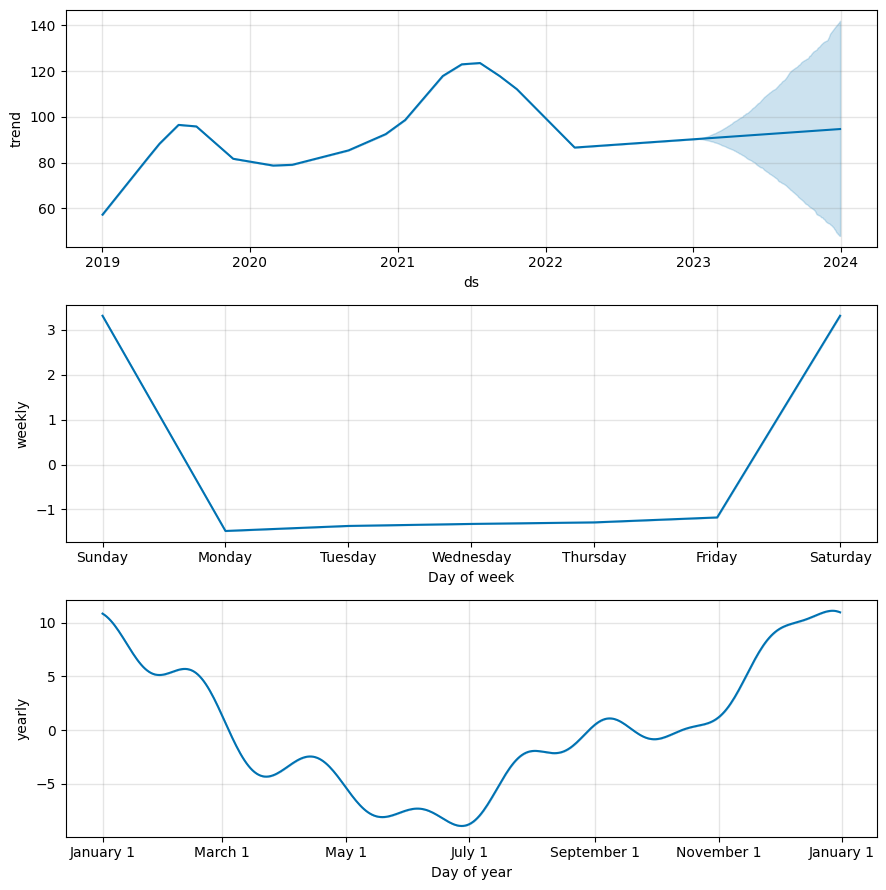

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['SBUX_Close'].reset_index().rename(columns={'Date': 'ds', 'SBUX_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['SBUX_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2rntai/4hd0ns0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2rntai/7dkl14ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34129', 'data', 'file=/tmp/tmprf2rntai/4hd0ns0i.json', 'init=/tmp/tmprf2rntai/7dkl14ar.json', 'output', 'file=/tmp/tmprf2rntai/prophet_modelwp182h7n/prophet_model-20241120195155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:51:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:51:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


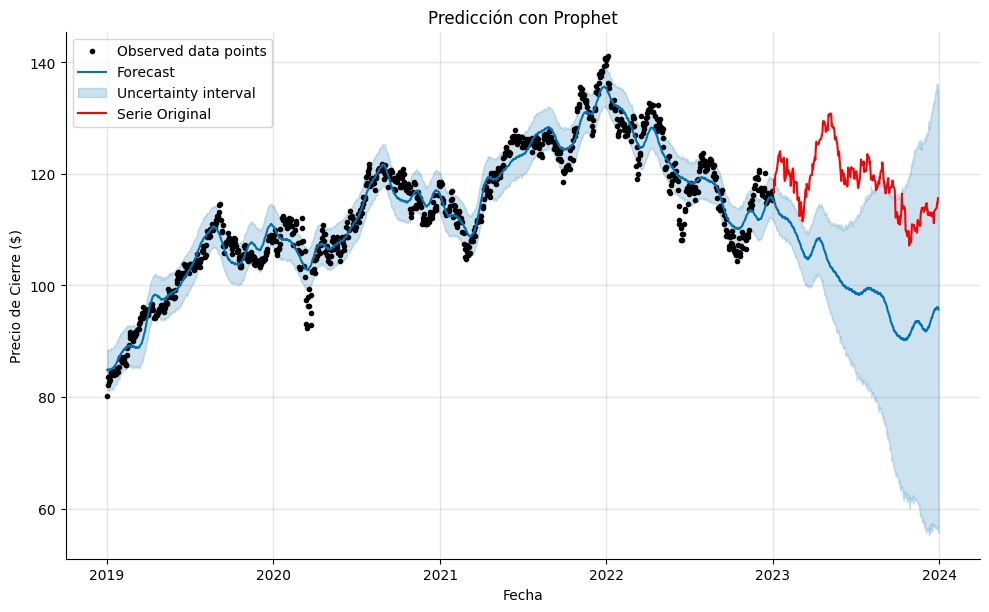

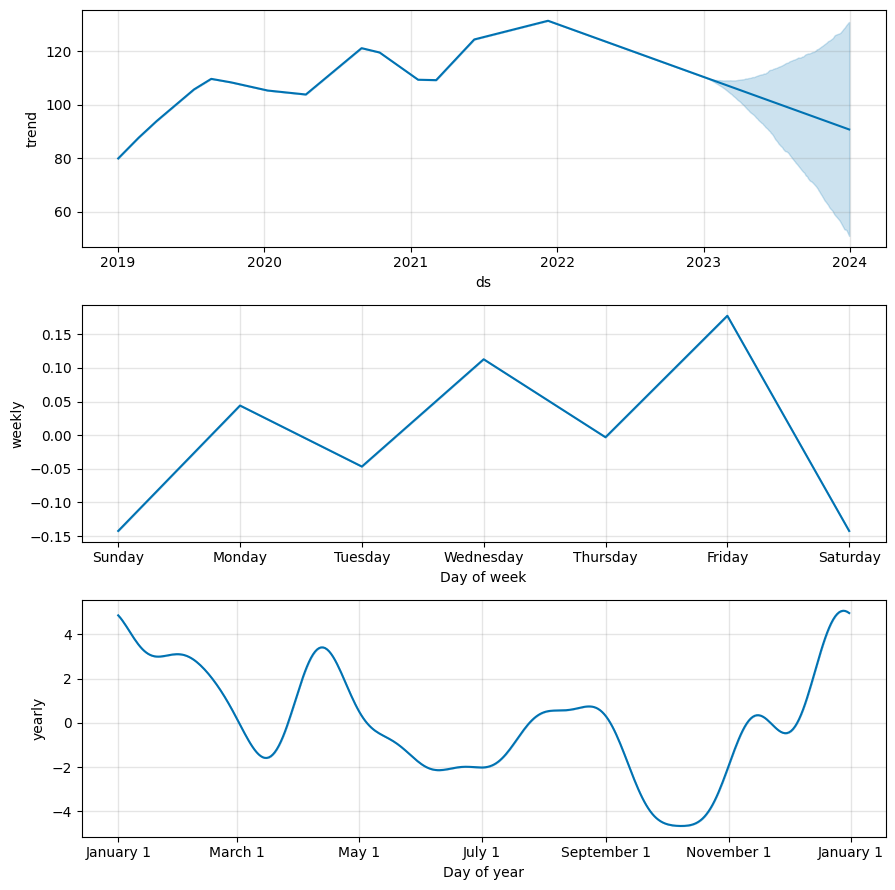

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['NSRGY_Close'].reset_index().rename(columns={'Date': 'ds', 'NSRGY_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['NSRGY_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2rntai/0di674n_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2rntai/x8ok7lvl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99296', 'data', 'file=/tmp/tmprf2rntai/0di674n_.json', 'init=/tmp/tmprf2rntai/x8ok7lvl.json', 'output', 'file=/tmp/tmprf2rntai/prophet_model4p_u1c02/prophet_model-20241120195053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


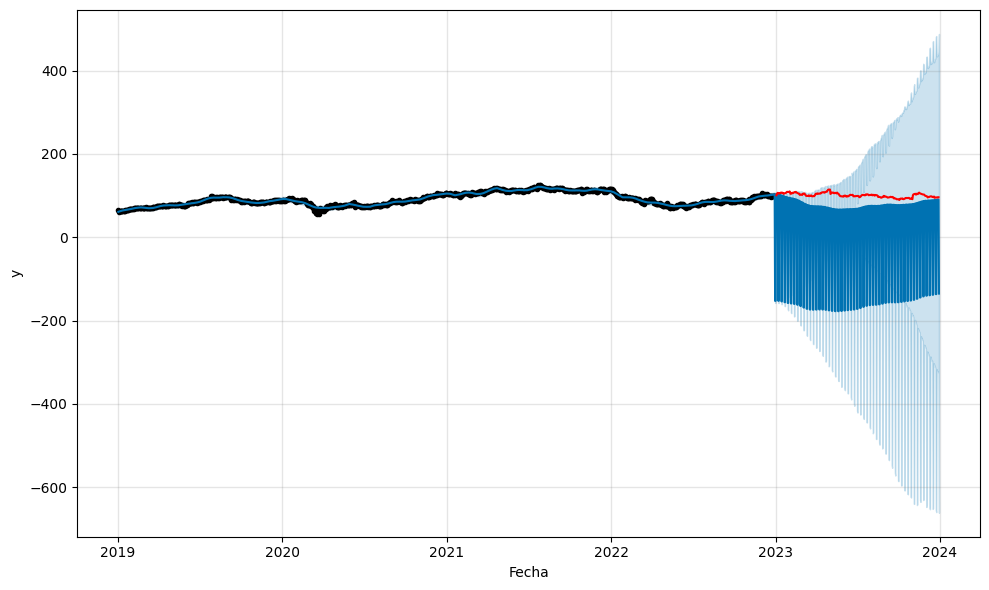

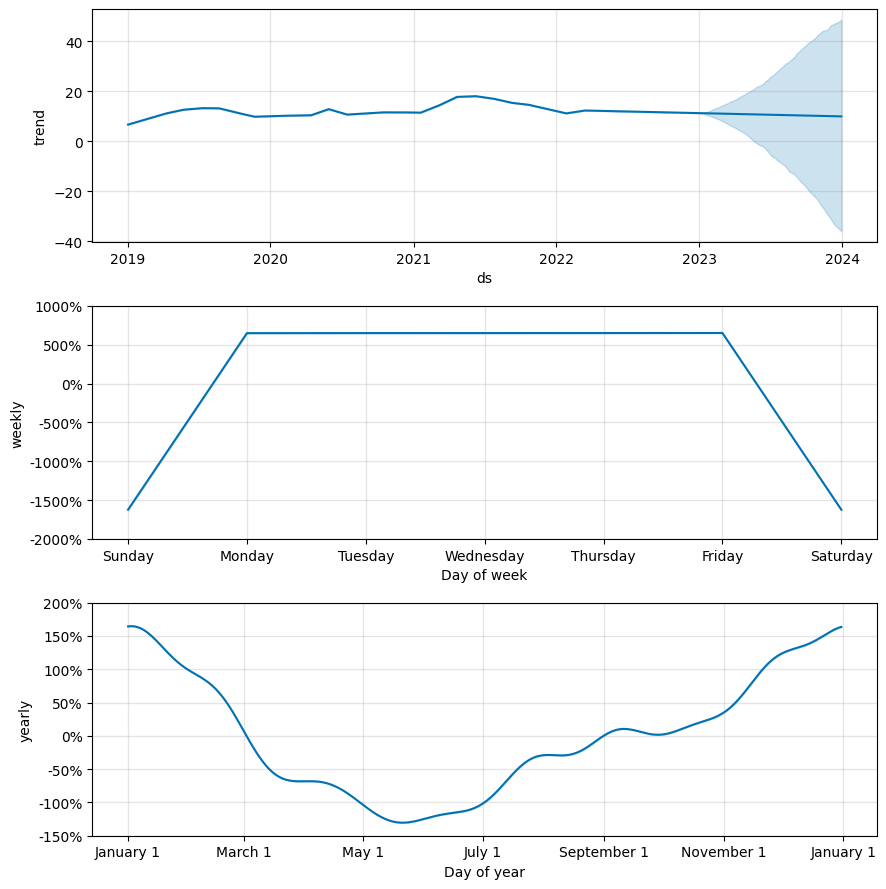

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['SBUX_Close'].reset_index().rename(columns={'Date': 'ds', 'SBUX_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['SBUX_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2rntai/8wta38lb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprf2rntai/og_w8cse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7105', 'data', 'file=/tmp/tmprf2rntai/8wta38lb.json', 'init=/tmp/tmprf2rntai/og_w8cse.json', 'output', 'file=/tmp/tmprf2rntai/prophet_modele5ol6wi1/prophet_model-20241120195230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:52:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:52:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


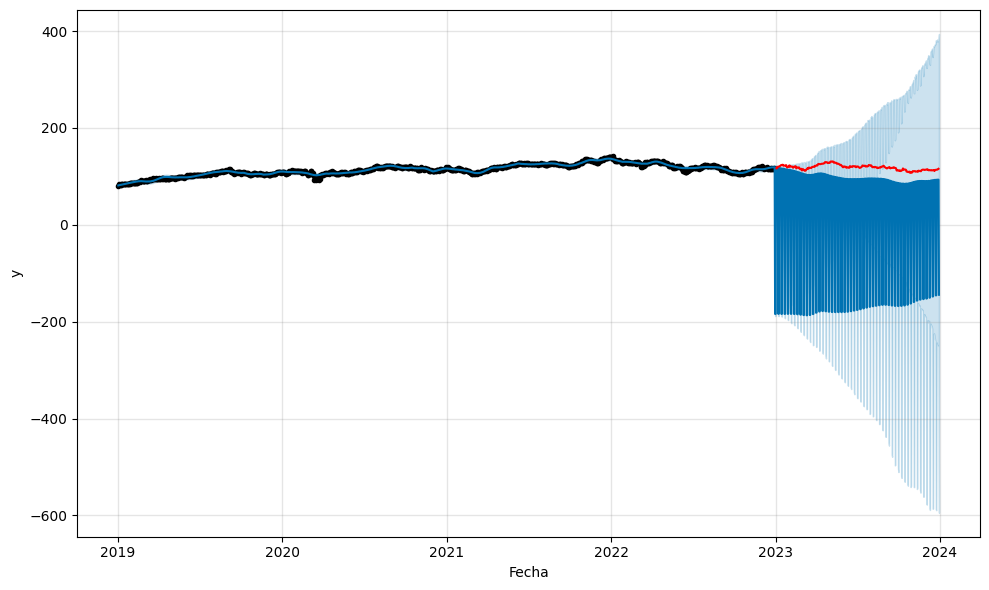

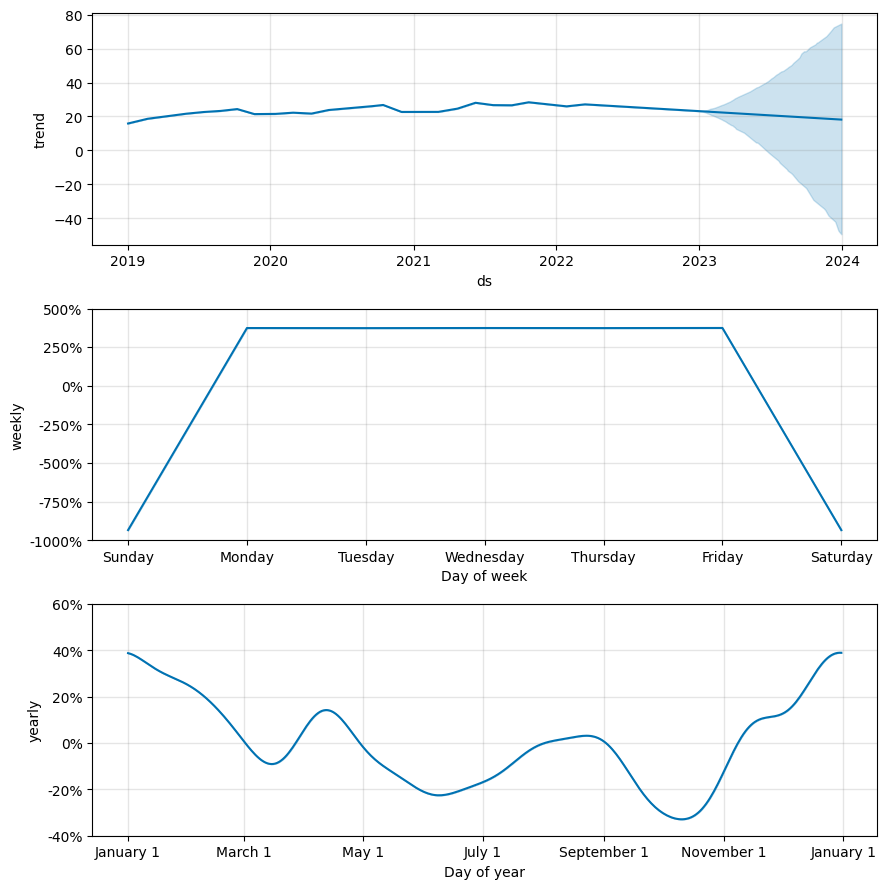

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['NSRGY_Close'].reset_index().rename(columns={'Date': 'ds', 'NSRGY_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['NSRGY_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)


# CONCLUSIÓN:

El análisis realizado sobre las series de tiempo de Starbucks y Nestlé, desde el 1 de enero de 2019 hasta el 1 de enero de 2023, tuvo como objetivo entender la relación entre ambas empresas después de su colaboración en 2018, además de identificar patrones en sus precios de mercado usando herramientas estadísticas y modelos predictivos.

Se encontró que Nestlé, al operar en diferentes mercados globales con varios códigos, tiene un análisis más complicado. Por otro lado, Starbucks tiene un solo código internacional, lo que facilita su análisis y permite encontrar tendencias más fácilmente. Con el uso de promedios móviles y regresiones polinómicas, se detectaron tendencias claras en los precios de ambas empresas. Aunque en general los precios se mantuvieron estables, también se observaron fluctuaciones por factores externos del mercado.

La descomposición de las series en partes como tendencia, estacionalidad y ruido mostró que la estacionalidad no tiene un efecto significativo en los precios de las empresas. Esto indica que los cambios en los precios no están ligados a patrones estacionales. Las pruebas de hipótesis, como la de Dickey-Fuller, confirmaron que las series no son estacionarias, mientras que la prueba t pareada reafirmó que la estacionalidad no tiene un impacto importante.

En cuanto a la causalidad de Granger, se encontró que lo que sucede en Nestlé días antes afecta a Starbucks. Para rezagos de 2, 3, 4 y 5 días, se comprobó que hay una relación significativa, mientras que para 1 día no se encontró evidencia de conexión. Esto significa que lo que pasa con Nestlé en días anteriores puede influir en Starbucks posteriormente.

El uso del modelo Prophet permitió observar tendencias a futuro, aunque con algunas limitaciones. El modelo funciona bien para detectar patrones generales, pero no es tan útil para identificar cambios drásticos o imprevistos. Las predicciones permiten anticipar algunos valores futuros, pero su nivel de confianza no es absoluto debido a un margen de incertidumbre considerable.

En resumen, aunque Nestlé y Starbucks están conectadas operativa y estratégicamente, sus movimientos en el mercado no presentan patrones estacionales claros ni una relación directa constante. Las herramientas utilizadas, como el modelo Prophet y la causalidad de Granger, brindaron información útil, pero su capacidad está limitada por la complejidad y los cambios constantes del mercado financiero. Este estudio muestra la importancia de usar métodos estadísticos y modelos predictivos para comprender mejor cómo funcionan los mercados globales.